## WeatherPy Analysis

##### Observable Trends
- It appears that after several generations of the program, no matter what 500 cities we select, a distinct pattern appears on a scatterplot graph of 500 random city locations across the globe.
- This code was originally completed in 6/21/2018, summer in the North. The temperature graph appears to skew to more hotter temperatures recorded north of the equator to reflect the summer solstice and how the northern hemisphere is tilted slightly toward the Sun, which would be reflected in more recorded hot temperatures north of the equator.

##### Shape of Scatter Plots
- The distinct shapes of the graphs are notable, as the patterns are always the same no matter how many times the script is run. This all depends on the size of the graphs, but mine reflect these examples.
- The 'Temperature' pattern either looks like a dolphin or Cuba.
- The 'humidity' chart always generally looks like heavy clouds dispersing water particles down below. 
- The 'cloudiness' chart looks like an evaporating lake forming clouds. 
- The 'wind speed' chart looks like dandelion spores being dispersed. The pattern being the same seemingly no matter how many times we run the script is notable in this way too.

In [1]:
import random
from citipy import citipy
import pandas as pd
import openweathermapy.core as ow
import numpy as np
import matplotlib.pyplot as plt

#your openweathermap api key goes here. if you see this code on public github, please use your own api when running this code.
#or don't. i can't really stop you. but it'd be on your conscience until you ask me for forgiveness in person.
ow_api = "25bc90a1196e6f153eece0bc0b0fc9eb"
#ow settings
settings = {"units": "imperial", "appid": ow_api}

## Generate Cities List

In [2]:
#create a dataframe with a list of at least 500 random cities from citipy
#see citipy_testing.ipynb for a bunch of drafts

citynames = []
citycountries = []

#saw someone else do this. they set their range to 1500 so that they could trim it down...
for i in range(1500):
    randlat = random.uniform(-90, 90)
    randlong = random.uniform(-180, 180)
    city = citipy.nearest_city(randlat, randlong)
    citynames.append(city.city_name)
    citycountries.append(city.country_code)
    
city_df = pd.DataFrame({'City': citynames,
                  'Country': citycountries})

city_df.count()

City       1500
Country    1500
dtype: int64

In [3]:
#trim duplicates. if you have about 1300+ random results then you wind up with just over 500 unique values.
#this doesn't feel elegant at all but it sure is nice to watch in action
#it also gets trimmed down more later on when OWM doesn't find certain cities... edge-of-your-seat kinda stuff
city_df = city_df.drop_duplicates(keep="first")
city_df.count()

City       640
Country    640
dtype: int64

In [4]:
#setting index and adding columns to prepare for some really impressive stuff
city_df.set_index(['City', 'Country'])
city_df['City'] = city_df['City'].str.title()
city_df['Country'] = city_df['Country'].str.upper()
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Temperature'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Description'] = ''
city_df['Time Retrieved'] = ''
city_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Fairbanks,US,,,,,,,,
1,Basco,PH,,,,,,,,
2,Paso De Los Toros,UY,,,,,,,,
3,Arraial Do Cabo,BR,,,,,,,,
4,Krasnorechenskiy,RU,,,,,,,,


## Perform API Calls

In [5]:
#the big iterator. see citipy_testing.ipynb for drafts
#identifies the City Name in the dataframe, then finds it using the openweathermap wrapper. adds all relevant information.
#not all cities will be found by the wrapper, so we'll skip anything that doesn't return a value and place 'NaN' into its cell
#we'll delete that row later

#saving some variables for the printed statements down below
counter = 0
totalcities = city_df['City'].count().sum()

print(f"Retrieving OpenWeatherMaps weather data for {totalcities} random cities from citipy...")

#thanks to the NearestRestr and try/except exercises for this
for index, row in city_df.iterrows():

    cityloc = row['City'] + ',' + row['Country']
    
    try:
        data = ow.get_current(cityloc, **settings)
        row['Temperature'] = data('main.temp')
        row['Humidity'] = data('main.humidity')
        row['Cloudiness'] = data('clouds.all')
        row['Wind Speed'] = data('wind.speed')
        row['Latitude'] = data('coord.lat')
        row['Longitude'] = data('coord.lon')
        row['Description'] = data['weather'][0]['description']
        row['Time Retrieved'] = data('dt')
        print(f"Retrieving Data at index {index} for: {row['City']},{row['Country']}; loading values...")
    except:
        row['Latitude'] = np.NaN
        counter += 1
        print(f"Missing Data at index {index} for: {row['City']}, {row['Country']}; skipping...")

print(f"There were {totalcities} randomly selected citipy cities, and {counter} were missing weather data on OpenWeatherMaps.")

Retrieving OpenWeatherMaps weather data for 640 random cities from citipy...
Retrieving Data at index 0 for: Fairbanks,US; loading values...
Retrieving Data at index 1 for: Basco,PH; loading values...
Retrieving Data at index 2 for: Paso De Los Toros,UY; loading values...
Retrieving Data at index 3 for: Arraial Do Cabo,BR; loading values...
Retrieving Data at index 4 for: Krasnorechenskiy,RU; loading values...
Retrieving Data at index 5 for: Saint-Philippe,RE; loading values...
Retrieving Data at index 6 for: Ravar,IR; loading values...
Retrieving Data at index 7 for: Tromso,NO; loading values...
Retrieving Data at index 8 for: Rurrenabaque,BO; loading values...
Retrieving Data at index 9 for: Crawfordsville,US; loading values...
Missing Data at index 10 for: Asau, TV; skipping...
Retrieving Data at index 11 for: Northam,AU; loading values...
Retrieving Data at index 12 for: Sakaiminato,JP; loading values...
Missing Data at index 13 for: Vaitupu, WF; skipping...
Retrieving Data at inde

Retrieving Data at index 176 for: Souillac,MU; loading values...
Retrieving Data at index 177 for: Neuquen,AR; loading values...
Retrieving Data at index 179 for: Inta,RU; loading values...
Retrieving Data at index 180 for: Domoni,KM; loading values...
Retrieving Data at index 182 for: Sobolevo,RU; loading values...
Missing Data at index 183 for: Airai, PW; skipping...
Retrieving Data at index 184 for: Port Elizabeth,ZA; loading values...
Retrieving Data at index 185 for: Dingle,IE; loading values...
Retrieving Data at index 187 for: Ponta Do Sol,CV; loading values...
Retrieving Data at index 189 for: Hami,CN; loading values...
Retrieving Data at index 192 for: Zhanakorgan,KZ; loading values...
Missing Data at index 193 for: Tsihombe, MG; skipping...
Retrieving Data at index 194 for: Noumea,NC; loading values...
Retrieving Data at index 195 for: Calderitas,MX; loading values...
Retrieving Data at index 197 for: Kapaa,US; loading values...
Missing Data at index 200 for: Saleaula, WS; sk

Retrieving Data at index 435 for: Provideniya,RU; loading values...
Retrieving Data at index 437 for: Cienfuegos,CU; loading values...
Retrieving Data at index 438 for: Sitka,US; loading values...
Retrieving Data at index 439 for: San Patricio,MX; loading values...
Retrieving Data at index 443 for: Datong,CN; loading values...
Retrieving Data at index 444 for: Am Timan,TD; loading values...
Missing Data at index 446 for: Louisbourg, CA; skipping...
Retrieving Data at index 452 for: Buala,SB; loading values...
Retrieving Data at index 453 for: Fukue,JP; loading values...
Retrieving Data at index 454 for: Sao Filipe,CV; loading values...
Retrieving Data at index 457 for: Barra,GM; loading values...
Missing Data at index 459 for: Sentyabrskiy, RU; skipping...
Retrieving Data at index 464 for: Mayor Pablo Lagerenza,PY; loading values...
Retrieving Data at index 466 for: San Jose,PH; loading values...
Retrieving Data at index 469 for: Torbay,CA; loading values...
Retrieving Data at index 47

Retrieving Data at index 752 for: Vestmanna,FO; loading values...
Retrieving Data at index 753 for: Tautira,PF; loading values...
Retrieving Data at index 755 for: College,US; loading values...
Retrieving Data at index 757 for: Rawson,AR; loading values...
Retrieving Data at index 759 for: Frederiksberg,DK; loading values...
Retrieving Data at index 763 for: Stokmarknes,NO; loading values...
Retrieving Data at index 766 for: Rio Cuarto,AR; loading values...
Retrieving Data at index 767 for: Tumpat,MY; loading values...
Retrieving Data at index 775 for: Turochak,RU; loading values...
Retrieving Data at index 778 for: Kuryk,KZ; loading values...
Retrieving Data at index 783 for: Mama,RU; loading values...
Retrieving Data at index 786 for: San Policarpo,PH; loading values...
Retrieving Data at index 787 for: Miyako,JP; loading values...
Retrieving Data at index 789 for: Benemerito De Las Americas,MX; loading values...
Missing Data at index 790 for: Rawannawi, KI; skipping...
Retrieving Da

Retrieving Data at index 1132 for: Te Anau,NZ; loading values...
Retrieving Data at index 1133 for: Teguise,ES; loading values...
Retrieving Data at index 1141 for: Iqaluit,CA; loading values...
Retrieving Data at index 1143 for: Shimoda,JP; loading values...
Missing Data at index 1145 for: Yunjinghong, CN; skipping...
Retrieving Data at index 1148 for: Praia Da Vitoria,PT; loading values...
Missing Data at index 1153 for: Azimur, MA; skipping...
Retrieving Data at index 1156 for: Zyryanka,RU; loading values...
Retrieving Data at index 1157 for: Willmar,US; loading values...
Retrieving Data at index 1162 for: Buta,CD; loading values...
Retrieving Data at index 1164 for: Severomuysk,RU; loading values...
Retrieving Data at index 1168 for: Bayangol,RU; loading values...
Retrieving Data at index 1171 for: Ajaccio,FR; loading values...
Retrieving Data at index 1174 for: Eidsvag,NO; loading values...
Retrieving Data at index 1175 for: Berlevag,NO; loading values...
Retrieving Data at index 

In [6]:
#a look at the dataframe before dropping NaN values
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Fairbanks,US,64.84,-147.72,54.21,93,76,3.31,mist,1530187080
1,Basco,PH,20.45,121.97,84.53,100,0,10.13,clear sky,1530190666
2,Paso De Los Toros,UY,-32.81,-56.52,42.5,71,8,4.21,clear sky,1530190713
3,Arraial Do Cabo,BR,-22.97,-42.02,71.6,73,20,9.17,few clouds,1530187200
4,Krasnorechenskiy,RU,44.63,135.35,57.44,100,92,2.26,light rain,1530190714
5,Saint-Philippe,RE,-21.36,55.77,73.4,60,40,11.41,scattered clouds,1530189000
6,Ravar,IR,31.27,56.81,93.35,8,0,4.54,clear sky,1530190714
7,Tromso,NO,69.65,18.96,46.4,87,75,8.05,light rain,1530188400
8,Rurrenabaque,BO,-14.44,-67.53,71.6,100,90,1.81,mist,1530187200
9,Crawfordsville,US,40.04,-86.9,69.49,100,1,2.75,mist,1530189300


In [7]:
#delete all NaN values and return a final count of cities listed
city_df = city_df.dropna(axis=0, how="any")
finalcities = city_df['City'].count().sum()
print(f"{finalcities + counter} cities were generated. {counter} cities will be dropped. {finalcities} random cities will be plotted.")

# statistically, this shouldn't filter to less than 500 cities. but i mean, if it ever did, well, i wouldn't know what to do.
if city_df['City'].count().sum() > 499:
    print("Success!")
else:
    print("NOTE: Less than 500 cities were filtered. I suggest running the script again from the start. Congrats on the statistical anomaly though!")

640 cities were generated. 81 cities will be dropped. 559 random cities will be plotted.
Success!


In [8]:
#convert the datetime to be readable; other formatting stuff, print final dataframe before plotting
city_df['Time Retrieved'] = pd.to_datetime(city_df['Time Retrieved'], unit='s')
city_df['Description'] = city_df['Description'].str.title()
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Fairbanks,US,64.84,-147.72,54.21,93,76,3.31,Mist,2018-06-28 11:58:00
1,Basco,PH,20.45,121.97,84.53,100,0,10.13,Clear Sky,2018-06-28 12:57:46
2,Paso De Los Toros,UY,-32.81,-56.52,42.5,71,8,4.21,Clear Sky,2018-06-28 12:58:33
3,Arraial Do Cabo,BR,-22.97,-42.02,71.6,73,20,9.17,Few Clouds,2018-06-28 12:00:00
4,Krasnorechenskiy,RU,44.63,135.35,57.44,100,92,2.26,Light Rain,2018-06-28 12:58:34
5,Saint-Philippe,RE,-21.36,55.77,73.4,60,40,11.41,Scattered Clouds,2018-06-28 12:30:00
6,Ravar,IR,31.27,56.81,93.35,8,0,4.54,Clear Sky,2018-06-28 12:58:34
7,Tromso,NO,69.65,18.96,46.4,87,75,8.05,Light Rain,2018-06-28 12:20:00
8,Rurrenabaque,BO,-14.44,-67.53,71.6,100,90,1.81,Mist,2018-06-28 12:00:00
9,Crawfordsville,US,40.04,-86.9,69.49,100,1,2.75,Mist,2018-06-28 12:35:00


## Latitude vs. Temperature Plot

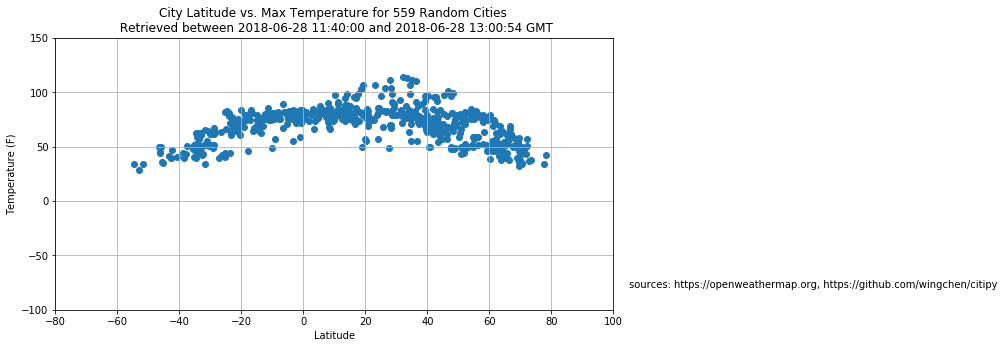

In [9]:
#time to set the time
mindate = city_df['Time Retrieved'].min()
maxdate = city_df['Time Retrieved'].max()

plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Temperature'], marker="o")
plt.title(f"City Latitude vs. Max Temperature for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -80, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-100, 150, 50)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

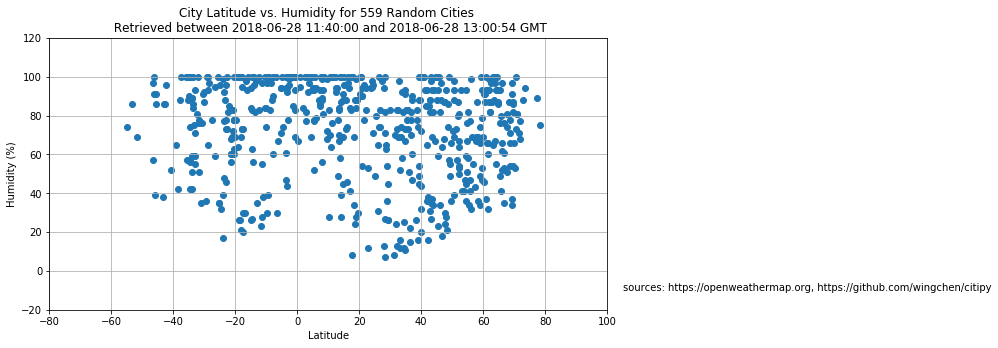

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o")
plt.title(f"City Latitude vs. Humidity for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -10, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-20, 120, 20)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

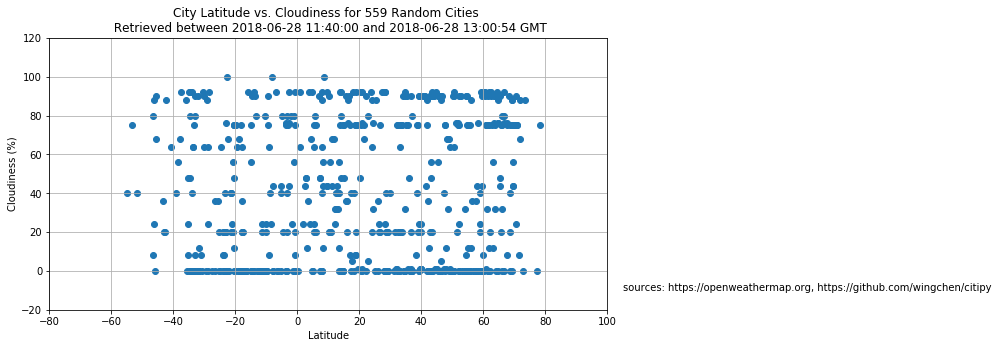

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o")
plt.title(f"City Latitude vs. Cloudiness for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -10, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-20, 120, 20)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

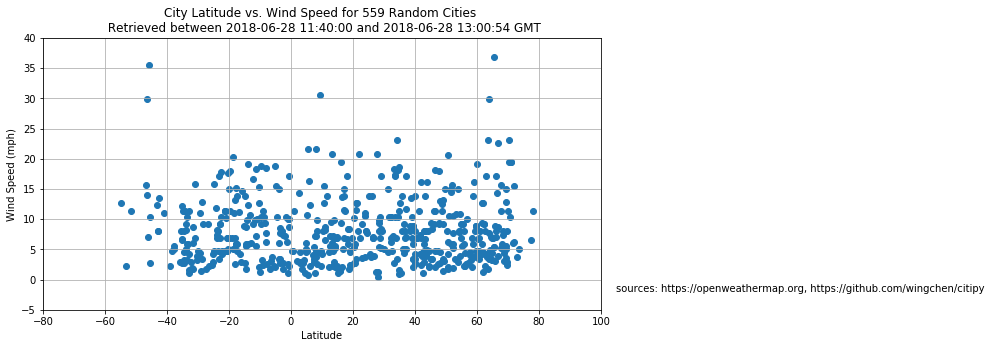

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o")
plt.title(f"City Latitude vs. Wind Speed for {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(105, -2, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-5, 40, 5)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

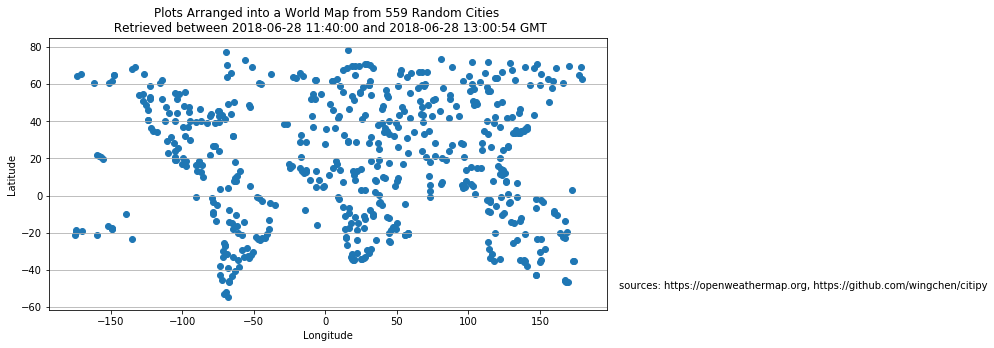

In [13]:
#cool it's a world map
plt.figure(figsize=(10,5))
plt.scatter(city_df['Longitude'], city_df['Latitude'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True, axis='y')
plt.title(f"Plots Arranged into a World Map from {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT")
plt.text(205, -50, "sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.show()

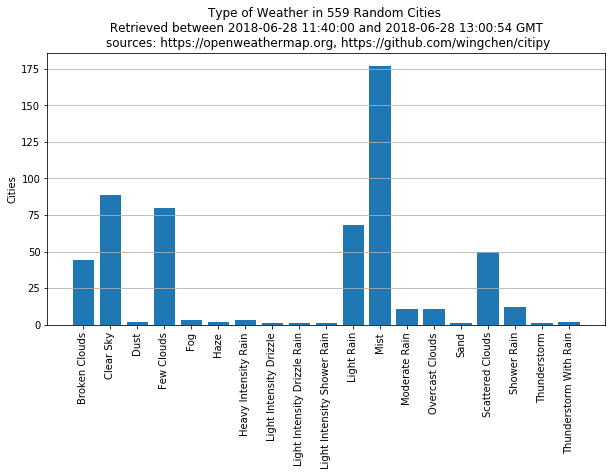

In [14]:
unique = city_df['Description'].unique().tolist()
counts = city_df['Description'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(unique, counts, align='center')
plt.xticks(rotation='vertical')
plt.ylabel("Cities")
plt.grid(True, axis='y')
plt.title(f"Type of Weather in {finalcities} Random Cities \n Retrieved between {mindate} and {maxdate} GMT \n sources: https://openweathermap.org, https://github.com/wingchen/citipy")
plt.show()

In [16]:
unique

['Mist',
 'Clear Sky',
 'Few Clouds',
 'Light Rain',
 'Scattered Clouds',
 'Broken Clouds',
 'Shower Rain',
 'Moderate Rain',
 'Overcast Clouds',
 'Heavy Intensity Rain',
 'Fog',
 'Thunderstorm With Rain',
 'Dust',
 'Haze',
 'Light Intensity Shower Rain',
 'Thunderstorm',
 'Light Intensity Drizzle Rain',
 'Sand',
 'Light Intensity Drizzle']

In [15]:
#TODO: add save to filepath here for final dataframe -> csv and plots -> png